# ATSC-500 Assignment VII (Stull Chap. 5 & 6)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
% matplotlib inline

## Chapter V - Q3

Given the following wind speeds measured at various heights in the boundary layer:

| z [m]  | U [m/s] |
| ------ | ------- |
| 2000   | 10.0    |
| 1000   | 10.0    |
| 500    | 9.5     |
| 300    | 9.0     |
| 100    | 8.0     |
| 50     | 7.4     |
| 20     | 6.5     |
| 10     | 5.8     |
| 4      | 5.0     |
| 1      | 3.7     |

Assume that the potential temperature increases with height at the constant rate of 6 K/km. Calculate the bulk Richardson number for each layer and indicate the static and dynamic stability of each layer. Also, show what part of the atmosphere is expected to be turbulent in these conditions.

**Ans**

Recall the definition of bulk Richardson number ($R_B$):

$$
R_B = \frac{g\Delta\overline{\theta_v}\Delta z}{\overline{\theta_v}\left[\left(\Delta\overline{U}\right)^2+\left(\Delta\overline{V}\right)^2\right]}
$$

Based on the given condition, $\Delta\overline{\theta_v} = 6\times 10^{-3}\ \mathrm{K\cdot m^{-1}}$

$\overline{\theta_v}$ is not mentioned in the question, here we take $\overline{\theta_v} = 273.15\ K$ as an example.

Based on the definition of statistical and dynamical stabilities, if $R_B < 0$, then the flow is statistically unstable, vice versa. If $R_B < R_c$, the the flow is dynamically unstable, if $R_B > R_T$, the flow is dynamically stable. The critical values here are taken as $R_c = 0.21, R_T = 1.0$.

In [2]:
Z = np.array([1, 4, 10, 20, 50, 100, 300, 500, 1000, 2000])
U = np.array([3.7, 5.0, 5.8, 6.5, 7.4, 8.0, 9.0, 9.5, 10.0, 10.0])
Theta = 6e-3*Z + 273.15

def Rb_1d(Z, U, Theta):
    dZ = np.gradient(Z, edge_order=2)
    dU = np.gradient(U, edge_order=2)
    dTheta = np.gradient(Theta, edge_order=2)
    return (9.8*dTheta*dZ)/(Theta*dU**2)

Rb = Rb_1d(Z, U, Theta)
stats_flag = Rb > 0
dyn_flag1 = Rb > 1.0
dyn_flag2 = Rb < 0.21

df = pd.DataFrame()
df['Height [m]'] = Z; df['Rb'] = Rb
df['statistically stable'] = stats_flag
df['dynamically stable'] = dyn_flag1
df['dynamically unstable'] = dyn_flag2

df

,Height [m],Rb,statistically stable,dynamically stable,dynamically unstable
0,1,0.000202,True,False,True
1,4,0.003954,True,False,True
2,10,0.024487,True,False,True
3,20,0.134482,True,False,True
4,50,0.611641,True,False,False
5,100,5.244007,True,True,False
6,300,15.207614,True,True,False
7,500,104.334601,True,True,False
8,1000,1895.754970,True,True,False
9,2000,5155.181483,True,True,False


All the layers in this measurement is statistically stable as the potential temperature increases with height, the positive lapse rate and wind shear keeps $R_B$ to be positive.

The layer from surface to 20 m is dynamically unstable due to the strong wind shear, which contributes to the total TKE budget through mechanical production. Kelvin-Helmholtz waves could be found in this layer. 

As the wind shear decreases with height, the mechanical production decreases and the buoyant production dominates the TKE budget. Thus, the inversion makes all the layers above 100 m become dynamically stable.

Layers between 20 and 50 m is neither dynamically stable nor unstable, the stability of this layer may depend on its previous state, the air in this layer with keep being turbulent (stable) if it was turbulent (stable) before the measurement.

## Chapter V - Q17

Given the following data:

$$
\begin{equation*}
\begin{array}{ll}
\overline{w^{'}\theta^{'}}=0.2\ \mathrm{K\cdot m\cdot s^{-1}} & u_* = 0.2\ \mathrm{m\cdot s^{-1}} \\
z_i = 500\ \mathrm{m}                                         & k = 0.4 \\
\displaystyle\frac{g}{\overline{\theta}} = 0.0333\ \mathrm{m\cdot s^{-2}\cdot K^{-1}} & z = 6\ \mathrm{m} \\
z_O = 0.01\ \mathrm{m}                                        & \mathrm{no\ mositure}
\end{array}
\end{equation*}
$$

Find:

$$
\begin{equation*}
\begin{array}{ll}
L                          & R_f\ \mathrm{at\ 6m\ (make\ assumptions\ to\ find\ this)} \\
z/L                        & R_i\ \mathrm{at\ 6m\ (make\ assumptions\ to\ find\ this)} \\
w_*                         & \mathrm{dynamic\ stability} \\
\theta_*                     & \mathrm{flow\ state\ (turbulent\ or\ not)} \\
\mathrm{static\ stability} & \\
\end{array}
\end{equation*}
$$

**Ans**

a, b & e) Recall the difinition of Obukhov length:

$$
L = \frac{-\overline{\theta_v u_*^3}}{k g \left(\overline{w^{'}\theta_v^{'}}\right)}
$$

When the surface-layer scaling parameter $z/L$ is positive, the layer is statically stable

c & d) Convective velocity scale and temperature scale are defined as:

$$
w_* = \left[\frac{gz_i}{\overline{\theta_v}}\left(\overline{w^{'}\theta_v^{'}}\right)\right]^{\frac{1}{3}}
$$

$$
\theta_* = \frac{\left(\overline{w^{'}\theta_v^{'}}\right)}{w_*}
$$

f, g, h & i) By the definition of flux and gradient Richardson number:

$$
R_f = \frac{\displaystyle\frac{g}{\overline{\theta}}\left(\overline{w^{'}\theta_v^{'}}\right)}{\left(\overline{u_i^{'}u_j^{'}}\right)\displaystyle\frac{\partial\overline{U_i}}{\partial x_j}}
$$

$$
R_i = \frac{\displaystyle\frac{g}{\overline{\theta}}\frac{\partial\overline{\theta_v}}{\partial\partial z}}{\left[\left(\frac{\partial\overline{U}}{\partial z}\right)^2+\left(\frac{\partial\overline{V}}{\partial z}\right)^2\right]}
$$

According to similarity theory, the mean wind speed is related with the roughness length and friction velocity *(assuming $\overline{V} = 0$)*:

$$
\frac{\overline{U}}{u_*} = \frac{1}{k}\ln\frac{z}{z_O} 
$$

$$
\frac{\partial\overline{U}}{\partial z} = \frac{u_*}{k\cdot z\cdot z_O}
$$

And friction velocity is also related with Reynold's stress:

$$
u_*^2 = \frac{\tau}{\rho} = \overline{u_i^{'}u_j^{'}}
$$

For the gradient Richardson number, here we *assume the air follows the dry adiabatic process, $\displaystyle\frac{\partial{\theta}}{\partial z} = 0$ as there is no moisture.*

In [2]:
w_theta = 0.2;    u_s = 0.2
zi = 500;         k = 0.4
g_theta = 0.0333; z = 6
z_r = 0.01

L = (-1.0/g_theta)*(u_s**3)/w_theta/k
zeta = z/L
w_s = (zi*g_theta*w_theta)**(1/3)
theta_s = w_theta/w_s

gradU = k*u_s/(z*z_r)
uu = u_s**2
gamma = -9.8e-3
Rf = g_theta*w_theta/gradU/uu
Ri = 0

print("a) Obukhov length: {} [m]".format(L))
print("b) Surface-layer scaling parameter: {}".format(zeta))
print("c) Convective velocity scale {} [m/s]".format(w_s))
print("d) Temperature scale {} [K]".format(theta_s))
print("e) Statically unstable (zeta < 0)")
print("f) Rf = {}".format(Rf))
print("g) Ri = {}, assuming dry adiabatic".format(Ri))
print("h) Dynamically unstable (Ri < Rc)")
print("i) Likely to be turbulent (Rf < 1, Ri < Rc)")

a) Obukhov length: -3.003003003003003 [m]
b) Surface-layer scaling parameter: -1.9980000000000002
c) Convective velocity scale 1.493303482254768 [m/s]
d) Temperature scale 0.13393124865550848 [K]
e) Statically unstable (zeta < 0)
f) Rf = 0.12487499999999996
g) Ri = 0, assuming dry adiabatic
h) Dynamically unstable (Ri < Rc)
i) Likely to be turbulent (Rf < 1, Ri < Rc)


## Chapter VI - Q14, 15

14) Let $K_m = 5\ \mathrm{m^2\cdot s^{-1}}$ constant with height. Calculate and plot:
$$
u^{'}w^{'}\qquad\qquad w^{'}\theta_v^{'}
$$

from 0 to 50 m using the data from problem 26 of Chapt. 5

| $z$ [m]  | $\overline{\theta_v}$ [K] | $\overline{U}$ [m/s] |
| -------- | ------------------------- | -------------------- |
| 50       | 300                       | 14                   |
| 40       | 298                       | 10                   |
| 30       | 294                       | 8                    |
| 20       | 292                       | 7                    |
| 10       | 292                       | 7                    |
| 0        | 293                       | 2                    |

15.a) Using the answers from problem (14) above, find the initial tendency for virtual potential temperature for air at a height of 10 m.

b) If this tendency does not change with time, what is the new $\mathrm{\overline{\theta_v}}$ at 10 m, one
hour after the initial state (i.e., the state of problem 26, Chapt. 5 )?

**Ans**

According to K-theory:

$$
\overline{u_j^{'}\zeta^{'}} = -K\frac{\partial \overline{\zeta}}{\partial x_j}
$$

In the local closure, the initial tendency for virtual potential temperature is described as:

$$
\frac{\partial \overline{\theta}}{\partial t} = -\frac{\partial \left(\overline{w^{'}\theta_v^{'}}\right)}{\partial z}
$$

Height: [ 0 10 20 30 40 50]
U-flux: [-3.75 -1.25 -0.25 -0.75 -1.5  -2.5 ]
T-flux: [ 0.75  0.25 -0.5  -1.5  -1.5  -0.5 ]
The initial tendency for theta_v at 10 m is 0.0625 [K/s]
One hour later, theta_v at 10 m is 517.0 [K]


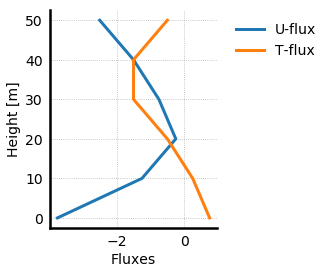

In [4]:
K = 5
z = np.array([0, 10, 20, 30, 40, 50])
theta_v = np.array([293, 292, 292, 294, 298, 300])
U = np.array([2, 7, 7, 8, 10, 14])

dz = np.gradient(z, edge_order=2)
uw = -1*K*np.gradient(U, edge_order=2)/dz
w_theta = -1*K*np.gradient(theta_v, edge_order=2)/dz
theta_trend = -1*np.gradient(w_theta)/dz
theta_v_t1 = theta_trend*60*60+theta_v

print("Height: {}".format(z))
print("U-flux: {}".format(uw))
print("T-flux: {}".format(w_theta))
print("The initial tendency for theta_v at 10 m is {} [K/s]".format(theta_trend[1]))
print("One hour later, theta_v at 10 m is {} [K]".format(theta_v_t1[1]))

fig = plt.figure(figsize=(3, 4))
ax = fig.gca()
ax.grid(linestyle=':')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
[j.set_linewidth(2.5) for j in ax.spines.values()]
ax.tick_params(axis="both", which="both", bottom="off", top="off", \
               labelbottom="on", left="off", right="off", labelleft="on")
ax.set_ylabel('Height [m]', fontsize=14)
ax.set_xlabel('Fluxes', fontsize=(14))
ax.plot(uw, z, lw=3, label='U-flux')
ax.plot(w_theta, z, lw=3, label='T-flux')
LG = ax.legend(bbox_to_anchor=(1.035, 1), prop={'size':14}); LG.draw_frame(False)

## Chapter VI - Q17

Given $K_m = kzu_*$, Solve $\overline{U}$ as a function of height in surface layer

**Ans**

Starting with the K-theory:

$$
\overline{u^{'}w^{'}} = -K_m\frac{\partial\overline{U}}{\partial z}
$$

On the surface layer, assuming the u-flux $\overline{u^{'}w^{'}}$ is constant with height, which brings:

$$
\overline{u^{'}w^{'}} \sim u_*^2
$$

Thus we have:

$$
\frac{\partial\overline{U}}{\partial z} = -\frac{u_*^2}{K_m} = -\frac{u_*}{kz}
$$

Thus

$$
\overline{U} = -\frac{u_*}{k}\ln z
$$